<a href="https://colab.research.google.com/github/BlackBoyZeus/QuantAnalysis/blob/main/fed_funds_rate_projections_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fed Funds Rate Projections in Python


The tutorial outlines the process of retrieving the latest federal funds rate projections from participants of the FOMC meeting. We'll source this data from the meeting minutes available on the Federal Reserve Bank's website. By leveraging Python's BeautifulSoup, we extract the relevant HTML table, and transform this table into a dataframe using pandas. Once transformed, we cleanse and standardize the data, preparing it for visualization via a heatmap.

![fed-funds-rate-projection-heatmap](https://i.imgur.com/ZO0Bpgd.png)

## Importance of the Fed Funds Rate

The federal funds rate (often referred to as the "fed funds rate") is the interest rate at which depository institutions (like banks and credit unions) lend reserve balances to other depository institutions overnight on an uncollateralized basis. It's set by the Federal Open Market Committee (FOMC), a component of the U.S. Federal Reserve (often just called "the Fed"). The fed funds rate is of paramount importance in the U.S. economy and financial markets for several reasons:

- **Benchmark Rate**: The fed funds rate serves as a benchmark for many other interest rates, both short-term and long-term. When the FOMC adjusts the fed funds rate, it often leads to changes in various other interest rates, including those for savings accounts, mortgages, and other consumer and business loans.

- **Monetary Policy Tool**: The rate is a primary tool the Fed uses to implement monetary policy. By adjusting the rate, the Fed can influence the amount of lending and borrowing in the economy, aiming to achieve objectives like controlling inflation, managing unemployment, and fostering economic growth.

- **Valuation of Financial Assets**: The discounting of future cash flows is a fundamental concept in finance. When valuing businesses, stocks, bonds, or virtually any financial asset, analysts often use the risk-free rate (often based on U.S. Treasury yields, which are influenced by the fed funds rate) as a starting point to determine the appropriate discount rate. A lower fed funds rate can lead to lower discount rates, which increases the present value of future cash flows, making assets more valuable and vice versa.

- **Cost of Capital**: Businesses factor in the cost of borrowing when making decisions about financing and capital investment. A lower fed funds rate can reduce the cost of borrowing, potentially encouraging businesses to invest in projects they might not have considered with higher interest rates. This can stimulate economic growth.

- **Consumer Spending**: The rate indirectly influences consumer borrowing costs. For instance, when the rate is low, consumers might be more inclined to finance large purchases, take out mortgages, or use credit, which can boost consumer spending and stimulate the economy.

- **Currency Value**: Interest rates play a role in determining the strength and value of a country's currency. Higher interest rates tend to attract foreign capital seeking the best return, which can drive up the value of the nation's currency. Conversely, lower rates might discourage investment, potentially weakening the currency.

- **Inflation Control**: By raising the fed funds rate, the Fed can make borrowing more expensive, which can slow down economic activity and control inflation. Conversely, lowering the rate can stimulate borrowing and spending, potentially increasing inflation.

- **Financial Market Sentiment**: The direction and magnitude of changes in the fed funds rate can influence investor sentiment. For example, a rate cut might be interpreted as the Fed's response to potential economic downturns, which could affect investor confidence.

The FOMC convenes regularly to evaluate the state of the economy and determine potential adjustments to the federal funds rate. On September 20, 2023, one such meeting was held. During this session, attendees provided their forecasts for the federal funds rate, real GDP growth, unemployment rate, and inflation spanning the years 2023 to 2026, as well as long-term projections. These predictions were grounded in data available as of the meeting date, combined with individual assessments of suitable monetary policy and other influential economic factors. The projections can be accessed at [www.federalreserve.gov](https://www.federalreserve.gov/monetarypolicy/fomcprojtabl20230920.htm).

The participants of the meetings include:

- **The Board of Governors**: This includes the Chair (Jerome Powell in 2023), the Vice Chair, and five other members. All seven members of the Board have a permanent voting right on the FOMC.
- **The President of the Federal Reserve Bank of New York**: This individual also has a permanent voting right, given the New York Fed's significant role in executing monetary policy operations.
- **Presidents of Four Other Reserve Banks**: These presidents serve on a rotating basis. The rotation is structured so that every year, one bank from each group of banks (there are four groups in total) has a vote.
- **Presidents of the remaining Federal Reserve Banks**: While they don't vote at every meeting, these presidents actively participate in FOMC discussions. They can express their views on the economic outlook and offer input on the policy direction, even though they don't vote on the final decision.

## Extract & Convert Funds Rate Projections

For this tutorial, we'll extract rate projections from the HTML table associated with Figure 3.E from [www.federalreserve.gov](https://www.federalreserve.gov/monetarypolicy/fomcprojtabl20230920.htm). The figure shows the count of FOMC meeting participants predicting a specific funds rate percent range by a given date. Instead of using broad ranges like 4 - 4.99% or 5 - 5.99%, the percentages are broken down into narrower bands such as 4.13-4.37 and 4.38-4.62. For instance, six participants anticipate the rate to fall between 4.38% and 4.62% by June 2024, while a single participant forecasts it to be within the 3.63 - 3.87% bracket.

The table appears as follows:

![fed-funds-rate-prediction](https://i.imgur.com/6Czfnjw.png)

Start by installing BeautifulSoup and other required packages, such as matplotlib.

In [1]:
!pip install -q requests bs4 pandas lxml seaborn matplotlib

Let's begin by downloading the complete HTML content of the website. After obtaining it, we'll feed this HTML into BeautifulSoup, enabling us to search  and pinpoint specific sections of interest. A manual look at the HTML data reveals that Figure 3.E is encapsulated within `<div>...</div>` tags. The section containing the projections also features an `h4` heading with the text: "Figure 3.E. Distribution of participants’ judgments of the midpoint of the appropriate target range for the federal funds rate or the appropriate target level for the federal funds rate, 2023–26 and over the longer run."

This means, we need to translate the location information of the section into a search query for BeautifulSoup. Specifically, we're looking for a `div` containing an `h4` with the text `Figure 3.E`.

After extracting the `div` HTML element, we can easily get the `table` nested within it.

In [2]:
import requests
from bs4 import BeautifulSoup

# get HTML of website: https://www.federalreserve.gov/monetarypolicy/fomcprojtabl20230920.htm
url = 'https://www.federalreserve.gov/monetarypolicy/fomcprojtabl20230920.htm'
response = requests.get(url)

# parse HTML into BeautifulSoup object
soup = BeautifulSoup(response.content, 'html.parser')

# find the table inside the div that contains the text "Figure 3.E" in the h4 tag
divs = soup.find_all('div')
div, = list(filter(lambda div: div.find('h4') is not None and "Figure 3.E" in div.find('h4').text, divs))
table = div.find('table')

In [3]:
# inspect the content of the table
print(str(table)[:1200], "...")

# uncomment the next two lines if you like to render the HTML table
# from IPython.display import display, HTML
# display(HTML(str(table)))

<table aria-labelledby="xf3e xf3ep1a" class="pubtables" data-sticky-columns="1" data-sticky-rows="2">
<thead>
<tr>
<th class="colhead" id="x3ea1" rowspan="2">Percent Range</th>
<th class="colhead" colspan="2" id="x3ea2">2023</th>
<th class="colhead" colspan="2" id="x3ea3">2024</th>
<th class="colhead" colspan="2" id="x3ea4">2025</th>
<th class="colhead" id="x3ea5">2026</th>
<th class="colhead" colspan="2" id="x3ea6">Longer Run</th>
</tr>
<tr>
<th class="colhead" headers="x3ea2" id="x3eb1">June projections</th>
<th class="colhead" headers="x3ea2" id="x3eb2">September projections</th>
<th class="colhead" headers="x3ea3" id="x3eb3">June projections</th>
<th class="colhead" headers="x3ea3" id="x3eb4">September projections</th>
<th class="colhead" headers="x3ea4" id="x3eb5">June projections</th>
<th class="colhead" headers="x3ea4" id="x3eb6">September projections</th>
<th class="colhead" headers="x3ea5" id="x3eb7">September projections</th>
<th class="colhead" headers="x3ea6" id="x3eb8">Jun

Transforming the HTML table containing the rate projections into a pandas dataframe is straightforward. By using the `pd.read_html(table)` method, pandas automatically identifies table headings, rows and columns, and seamlessly maps them with the appropriate dataframe indicies.

In [4]:
import pandas as pd
from io import StringIO

# transform the HTML table into a pandas dataframe
rates_as_reported = pd.read_html(StringIO(table.decode()))[0]
rates_as_reported

Percent Range             2023                                   2024  \
   Percent Range June projections September projections June projections   
0    2.13 - 2.37              NaN                   NaN              NaN   
1    2.38 - 2.62              NaN                   NaN              NaN   
2    2.63 - 2.87              NaN                   NaN              NaN   
3    2.88 - 3.12              NaN                   NaN              NaN   
4    3.13 - 3.37              NaN                   NaN              NaN   
5    3.38 - 3.62              NaN                   NaN              NaN   
6    3.63 - 3.87              NaN                   NaN              1.0   
7    3.88 - 4.12              NaN                   NaN              NaN   
8    4.13 - 4.37              NaN                   NaN              1.0   
9    4.38 - 4.62              NaN                   NaN              6.0   
10   4.63 - 4.87              NaN                   NaN              2.0   
11   4.88 - 5.12              NaN                   NaN              2.0   
12   5.13 - 5.37              2.0                   NaN              3.0   
13   5.38 - 5.62              4.0                   7.0              NaN   
14   5.63 - 5.87              9.0                  12.0              2.0   
15   5.88 - 6.12              2.0                   NaN              1.0   
16   6.13 - 6.37              1.0                   NaN              NaN   

                                     2025                        \
   September projections June projections September projections   
0                    NaN              NaN                   NaN   
1                    NaN              1.0                   NaN   
2                    NaN              2.0                   1.0   
3                    NaN              1.0                   1.0   
4                    NaN              3.0                   1.0   
5                    NaN              3.0                   3.0   
6                    NaN              2.0                   3.0   
7                    NaN              1.0                   2.0   
8                    NaN              2.0                   3.0   
9                    2.0              NaN                   NaN   
10                   3.0              1.0                   1.0   
11                   4.0              1.0                   1.0   
12                   4.0              NaN                   1.0   
13                   4.0              NaN                   1.0   
14                   1.0              1.0                   1.0   
15                   NaN              NaN                   NaN   
16                   1.0              NaN                   NaN   

                    2026       Longer Run                        
   September projections June projections September projections  
0                    NaN              NaN                   NaN  
1                    4.0             11.0                  12.0  
2                    5.0              3.0                   1.0  
3                    2.0              1.0                   1.0  
4                    2.0              1.0                   1.0  
5                    NaN              NaN                   1.0  
6                    NaN              1.0                   2.0  
7                    1.0              NaN                   NaN  
8                    2.0              NaN                   NaN  
9                    NaN              NaN                   NaN  
10                   1.0              NaN                   NaN  
11                   2.0              NaN                   NaN  
12                   NaN              NaN                   NaN  
13                   NaN              NaN                   NaN  
14                   NaN              NaN                   NaN  
15                   NaN              NaN                   NaN  
16                   NaN              NaN                   NaN

# Looking at the dataframe, we see that the table has been correctly converted into a multi-index dataframe structure. This includes all projections from 2023 to 2026 and beyond. Also, the subcolumns for the June and September projections, based on percent rate, are properly aligned with their respective years.

## Visualize Tallies of Rate Predictions Over Time

We aim to tally the projections by whole percent ranges. In other words, we're keen on the count of members who predict rates within broader bands like 3 to 3.99%, rather than narrower intervals such as 3.13-3.37% for a given date. To achieve this, we consolidate the dataframe rows to retain only these whole percent ranges, aggregating counts from the fractional bands into their respective whole number ranges.

To begin, we introduce a new column, `Percent Range Full Digit`, which captures the whole digit corresponding to the fractional value in the existing `Percent Range` column. We then group the data by this new column, summing the counts of participants for each fractional prediction. After discarding the original `Percent Range` column, the `Percent Range Full Digit` column is renamed to `Percent Range`. We then transpose the table, positioning the rates (2, 3, 4, 5, 6) as columns for clarity.

In [5]:
# create a new column that has the full digit of the "Percent Range" column
rates_as_reported['Percent Range Full Digit'] = rates_as_reported['Percent Range'].apply(lambda x: x.iloc[0].split('.')[0], axis=1)
# group by the new column and sum up all values in the columns
cols = rates_as_reported.columns.tolist()[1:-1]
rates_simplified = rates_as_reported.groupby('Percent Range Full Digit')[cols].sum(numeric_only=True).reset_index()
# clean and restructure new dataframe
rates_simplified.rename(columns={'Percent Range Full Digit': 'Percent Range'}, inplace=True)
rates_simplified = rates_simplified.astype(int)
rates_simplified = rates_simplified.T
# treat first row as column names
rates_simplified.columns = rates_simplified.iloc[0]
rates_simplified = rates_simplified.iloc[1:]
rates_simplified

('Percent Range', '')              2  3   4   5  6
2023       June projections        0  0   0  17  1
           September projections   0  0   0  19  0
2024       June projections        0  1  11   6  0
           September projections   0  0   9   9  1
2025       June projections        4  9   4   1  0
           September projections   2  9   5   3  0
2026       September projections  11  3   5   0  0
Longer Run June projections       15  2   0   0  0
           September projections  14  4   0   0  0

Wrapping up this tutorial, we'll create a heatmap that showcases the count of FOMC participants forecasting the funds rate within specific ranges (2% to 6%) for given dates (from 2023 to 2026 and beyond). To do this, we use seaborn's `heatmap` function on our `rates_simplified` dataframe and adjust parameters like the figure title, axis labels, and font size.

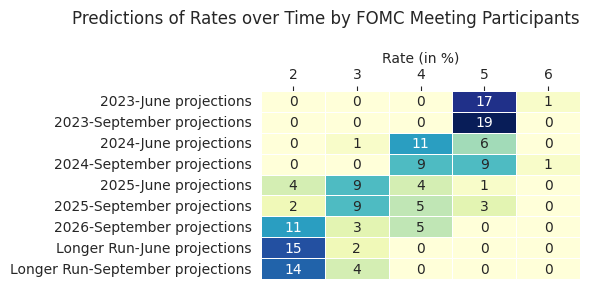

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid"), plt.figure(figsize=(6, 3))

# ceate a heatmap for the predicted rates
sns.heatmap(rates_simplified, annot=True, fmt="d", cmap="YlGnBu", cbar=False, linewidths=.5)

plt.title("Predictions of Rates over Time by FOMC Meeting Participants", loc="right", fontsize=12, pad=20)
plt.ylabel("", fontsize=10)
plt.gca().xaxis.set_label_position('top')
plt.xlabel("Rate (in %)", fontsize=10)
plt.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
plt.tight_layout()
plt.show()